<a href="https://colab.research.google.com/github/EkaFitriRamadani/MachineLearning/blob/Tugas02/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data penjualan berbagai ponsel dari berbagai perusahaan
1. id : Id
2. battery_power : energi total yang dapat disimpan baterai dalam satu waktu diukur dalam mAh
3. blue : memiliki blootooth atau tidak
4. clock_speed : kecepatan dimana mikroprosesor mengeksekusi instruksi
5. dual_sim : memiliki dukungan dual sim atau tidak
6. fc : kamera depan mega piksel
7. four_g : memiliki 4G atau tidak
8. int_memory : memeori internal dala Gigabyte
9. m_dep : kedalaman seluler dalam cm
10. mobile_wt : berat ponsel


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv('/content/test.csv')
df.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [53]:
df.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,4.328000,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,2.288155,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,1.000000,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,2.000000,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,4.000000,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,6.000000,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,8.000000,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


In [54]:
df.drop(["id"], axis=1, inplace=True)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [55]:
from sklearn.preprocessing import StandardScaler
df_scale = df[['battery_power', 'blue',	'clock_speed',	'dual_sim',	'fc',	'four_g',	'int_memory',	'm_dep',	'mobile_wt',	'n_cores',	'pc',	'px_height',	'px_width',	'ram',	'sc_h',	'sc_w',	'talk_time',	'three_g',	'touch_screen',	'wifi']]

scaler = StandardScaler()

df_scale = scaler.fit_transform(df_scale)
df_scale.shape

(1000, 20)

In [56]:
df_scale

array([[-0.47545131,  0.968496  ,  0.31260069, ..., -1.76021608,
         1.        , -1.01409939],
       [-0.94278218,  0.968496  , -1.25583195, ...,  0.56811207,
        -1.        , -1.01409939],
       [ 1.29207729,  0.968496  ,  1.51908734, ..., -1.76021608,
         1.        ,  0.98609664],
       ...,
       [-0.1469316 , -1.03252879, -0.16999397, ...,  0.56811207,
        -1.        , -1.01409939],
       [ 0.65817305,  0.968496  , -1.25583195, ..., -1.76021608,
         1.        , -1.01409939],
       [ 0.04971753,  0.968496  , -1.25583195, ...,  0.56811207,
        -1.        ,  0.98609664]])

In [57]:
data = pd.DataFrame(df_scale)
data.columns = ['battery_power', 'blue',	'clock_speed',	'dual_sim',	'fc',	'four_g',	'int_memory',	'm_dep',	'mobile_wt',	'n_cores',	'pc',	'px_height',	'px_width',	'ram',	'sc_h',	'sc_w',	'talk_time',	'three_g',	'touch_screen',	'wifi']
data_cluster = data.copy()
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.475451,0.968496,0.312601,0.966559,2.108676,-0.974329,-1.581269,-1.487247,1.535535,-0.580671,0.976026,-0.926990,0.391912,1.229373,0.001158,0.397363,-1.653355,-1.760216,1.0,-1.014099
1,-0.942782,0.968496,-1.255832,0.966559,-0.132927,1.026347,1.509303,1.006341,1.478120,0.293833,0.319433,0.274729,-0.871028,1.614643,-1.388231,-1.254383,-0.743418,0.568112,-1.0,-1.014099
2,1.292077,0.968496,1.519087,-1.034598,-0.805408,-0.974329,-0.367116,1.362567,1.334582,-0.580671,-0.993754,1.485693,0.287236,0.236313,1.158982,1.105254,-0.197456,-1.760216,1.0,0.986097
3,0.688249,-1.032529,-1.255832,0.966559,3.005317,1.026347,-0.477493,-0.062340,-1.249091,1.605590,1.632619,-0.767532,1.165604,1.612804,-0.461972,-1.254383,-0.743418,0.568112,1.0,-1.014099
4,0.429135,-1.032529,-0.169994,-1.034598,1.436195,1.026347,0.847037,-0.062340,-0.904602,0.731085,1.304323,0.281662,-0.977979,-0.336535,0.695852,0.633326,-0.743418,0.568112,-1.0,0.986097


K - Means

Text(0, 0.5, 'Inertia')

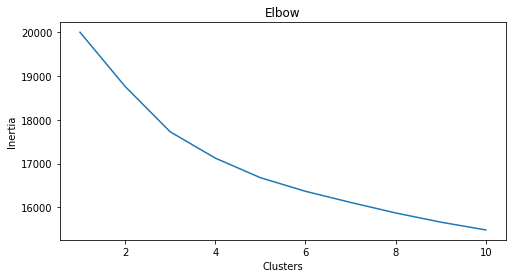

In [73]:
from sklearn.cluster import KMeans

clusters = []
range_values = range(1, 11)

for i in range_values :
  km = KMeans(n_clusters=i).fit(data)
  clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

In [64]:
model_kmeans3 = KMeans(n_clusters=3)
model_kmeans4 = KMeans(n_clusters=4)

model_kmeans3.fit(data)
model_kmeans4.fit(data)

data_cluster['cluster_kmeans3'] = model_kmeans3.labels_
data_cluster['cluster_kmeans4'] = model_kmeans4.labels_
data_cluster

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,cluster_kmeans3,cluster_kmeans4
0,-0.475451,0.968496,0.312601,0.966559,2.108676,-0.974329,-1.581269,-1.487247,1.535535,-0.580671,0.976026,-0.926990,0.391912,1.229373,0.001158,0.397363,-1.653355,-1.760216,1.0,-1.014099,2,1
1,-0.942782,0.968496,-1.255832,0.966559,-0.132927,1.026347,1.509303,1.006341,1.478120,0.293833,0.319433,0.274729,-0.871028,1.614643,-1.388231,-1.254383,-0.743418,0.568112,-1.0,-1.014099,0,3
2,1.292077,0.968496,1.519087,-1.034598,-0.805408,-0.974329,-0.367116,1.362567,1.334582,-0.580671,-0.993754,1.485693,0.287236,0.236313,1.158982,1.105254,-0.197456,-1.760216,1.0,0.986097,2,1
3,0.688249,-1.032529,-1.255832,0.966559,3.005317,1.026347,-0.477493,-0.062340,-1.249091,1.605590,1.632619,-0.767532,1.165604,1.612804,-0.461972,-1.254383,-0.743418,0.568112,1.0,-1.014099,0,2
4,0.429135,-1.032529,-0.169994,-1.034598,1.436195,1.026347,0.847037,-0.062340,-0.904602,0.731085,1.304323,0.281662,-0.977979,-0.336535,0.695852,0.633326,-0.743418,0.568112,-1.0,0.986097,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.044531,0.968496,0.433249,-1.034598,-1.029568,1.026347,1.122981,-0.062340,0.875263,1.168338,1.140174,0.039007,-0.743596,-0.016549,0.464287,0.633326,0.712481,0.568112,1.0,-1.014099,0,3
996,-1.479519,-1.032529,0.312601,0.966559,-1.029568,-0.974329,-1.139759,1.362567,1.334582,-0.143419,-1.322051,1.212995,0.892536,-0.189415,-0.925101,-1.018419,1.440430,-1.760216,1.0,0.986097,2,1
997,-0.146932,-1.032529,-0.169994,-1.034598,-0.805408,1.026347,-1.415702,-0.062340,-1.708411,-1.455175,0.319433,-0.346930,-0.943846,-0.842260,-1.619796,-1.254383,0.530493,0.568112,-1.0,-1.014099,1,3
998,0.658173,0.968496,-1.255832,0.966559,-1.029568,-0.974329,0.902226,-0.418566,0.903970,-1.017923,0.319433,-1.361458,-0.927917,0.340217,0.695852,1.341217,-0.925406,-1.760216,1.0,-1.014099,2,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

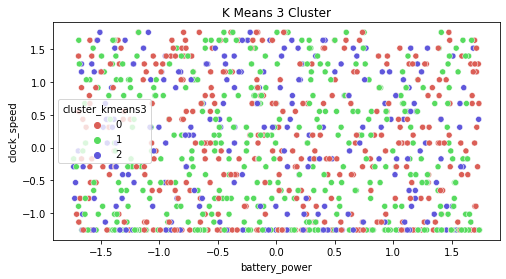

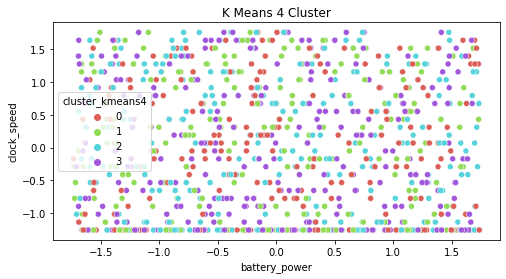

In [72]:
plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['battery_power'], data_cluster['clock_speed'], hue = data_cluster['cluster_kmeans3'], palette=sns.color_palette('hls',3))
plt.title('K Means 3 Cluster')

plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['battery_power'], data_cluster['clock_speed'], hue = data_cluster['cluster_kmeans4'], palette=sns.color_palette('hls',4))
plt.title('K Means 4 Cluster')
plt.show

Hierarchy

In [66]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.475451,0.968496,0.312601,0.966559,2.108676,-0.974329,-1.581269,-1.487247,1.535535,-0.580671,0.976026,-0.926990,0.391912,1.229373,0.001158,0.397363,-1.653355,-1.760216,1.0,-1.014099
1,-0.942782,0.968496,-1.255832,0.966559,-0.132927,1.026347,1.509303,1.006341,1.478120,0.293833,0.319433,0.274729,-0.871028,1.614643,-1.388231,-1.254383,-0.743418,0.568112,-1.0,-1.014099
2,1.292077,0.968496,1.519087,-1.034598,-0.805408,-0.974329,-0.367116,1.362567,1.334582,-0.580671,-0.993754,1.485693,0.287236,0.236313,1.158982,1.105254,-0.197456,-1.760216,1.0,0.986097
3,0.688249,-1.032529,-1.255832,0.966559,3.005317,1.026347,-0.477493,-0.062340,-1.249091,1.605590,1.632619,-0.767532,1.165604,1.612804,-0.461972,-1.254383,-0.743418,0.568112,1.0,-1.014099
4,0.429135,-1.032529,-0.169994,-1.034598,1.436195,1.026347,0.847037,-0.062340,-0.904602,0.731085,1.304323,0.281662,-0.977979,-0.336535,0.695852,0.633326,-0.743418,0.568112,-1.0,0.986097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.044531,0.968496,0.433249,-1.034598,-1.029568,1.026347,1.122981,-0.062340,0.875263,1.168338,1.140174,0.039007,-0.743596,-0.016549,0.464287,0.633326,0.712481,0.568112,1.0,-1.014099
996,-1.479519,-1.032529,0.312601,0.966559,-1.029568,-0.974329,-1.139759,1.362567,1.334582,-0.143419,-1.322051,1.212995,0.892536,-0.189415,-0.925101,-1.018419,1.440430,-1.760216,1.0,0.986097
997,-0.146932,-1.032529,-0.169994,-1.034598,-0.805408,1.026347,-1.415702,-0.062340,-1.708411,-1.455175,0.319433,-0.346930,-0.943846,-0.842260,-1.619796,-1.254383,0.530493,0.568112,-1.0,-1.014099
998,0.658173,0.968496,-1.255832,0.966559,-1.029568,-0.974329,0.902226,-0.418566,0.903970,-1.017923,0.319433,-1.361458,-0.927917,0.340217,0.695852,1.341217,-0.925406,-1.760216,1.0,-1.014099


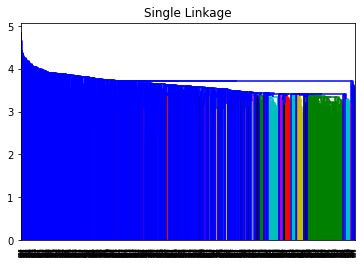

In [67]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

mergings_single = linkage(data, method="single", metric="euclidean")
dendrogram(mergings_single)
plt.title("Single Linkage")
plt.show()

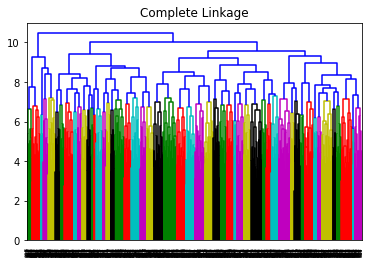

In [68]:
mergings_complete = linkage(data, method="complete", metric="euclidean")
dendrogram(mergings_complete)
plt.title("Complete Linkage")
plt.show()

In [69]:
cluster_hierarchy = cut_tree(mergings_complete, n_clusters=3).reshape(-1, )
cluster_hierarchy

array([0, 1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1,
       1, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0, 0, 1, 1, 2, 1, 1, 2,
       1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 1, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 0, 2, 1, 2, 0, 1, 2, 2,
       2, 2, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 2, 2, 0, 2, 0, 1, 1, 1, 2, 1,
       1, 2, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 0,
       2, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 0, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 0, 1, 2, 1, 0, 1, 2, 2, 0, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 0, 1, 2, 1, 2, 2, 2, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2,

In [70]:
data_cluster['cluster_hierarchy'] = cluster_hierarchy
data_cluster

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,cluster_kmeans3,cluster_kmeans4,cluster_hierarchy
0,-0.475451,0.968496,0.312601,0.966559,2.108676,-0.974329,-1.581269,-1.487247,1.535535,-0.580671,0.976026,-0.926990,0.391912,1.229373,0.001158,0.397363,-1.653355,-1.760216,1.0,-1.014099,2,1,0
1,-0.942782,0.968496,-1.255832,0.966559,-0.132927,1.026347,1.509303,1.006341,1.478120,0.293833,0.319433,0.274729,-0.871028,1.614643,-1.388231,-1.254383,-0.743418,0.568112,-1.0,-1.014099,0,3,1
2,1.292077,0.968496,1.519087,-1.034598,-0.805408,-0.974329,-0.367116,1.362567,1.334582,-0.580671,-0.993754,1.485693,0.287236,0.236313,1.158982,1.105254,-0.197456,-1.760216,1.0,0.986097,2,1,1
3,0.688249,-1.032529,-1.255832,0.966559,3.005317,1.026347,-0.477493,-0.062340,-1.249091,1.605590,1.632619,-0.767532,1.165604,1.612804,-0.461972,-1.254383,-0.743418,0.568112,1.0,-1.014099,0,2,2
4,0.429135,-1.032529,-0.169994,-1.034598,1.436195,1.026347,0.847037,-0.062340,-0.904602,0.731085,1.304323,0.281662,-0.977979,-0.336535,0.695852,0.633326,-0.743418,0.568112,-1.0,0.986097,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.044531,0.968496,0.433249,-1.034598,-1.029568,1.026347,1.122981,-0.062340,0.875263,1.168338,1.140174,0.039007,-0.743596,-0.016549,0.464287,0.633326,0.712481,0.568112,1.0,-1.014099,0,3,2
996,-1.479519,-1.032529,0.312601,0.966559,-1.029568,-0.974329,-1.139759,1.362567,1.334582,-0.143419,-1.322051,1.212995,0.892536,-0.189415,-0.925101,-1.018419,1.440430,-1.760216,1.0,0.986097,2,1,1
997,-0.146932,-1.032529,-0.169994,-1.034598,-0.805408,1.026347,-1.415702,-0.062340,-1.708411,-1.455175,0.319433,-0.346930,-0.943846,-0.842260,-1.619796,-1.254383,0.530493,0.568112,-1.0,-1.014099,1,3,1
998,0.658173,0.968496,-1.255832,0.966559,-1.029568,-0.974329,0.902226,-0.418566,0.903970,-1.017923,0.319433,-1.361458,-0.927917,0.340217,0.695852,1.341217,-0.925406,-1.760216,1.0,-1.014099,2,1,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Hierarchical Clustering')

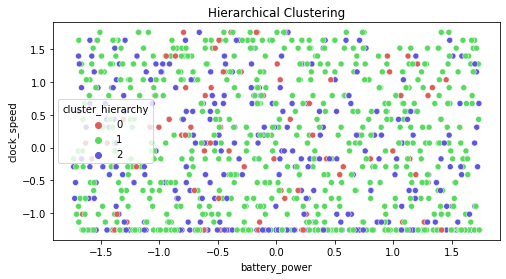

In [83]:
plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['battery_power'], data_cluster['clock_speed'], hue = data_cluster['cluster_hierarchy'], palette=sns.color_palette('hls',3))
plt.title('Hierarchical Clustering')

DBSCAN

In [74]:
from sklearn.cluster import DBSCAN
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.475451,0.968496,0.312601,0.966559,2.108676,-0.974329,-1.581269,-1.487247,1.535535,-0.580671,0.976026,-0.926990,0.391912,1.229373,0.001158,0.397363,-1.653355,-1.760216,1.0,-1.014099
1,-0.942782,0.968496,-1.255832,0.966559,-0.132927,1.026347,1.509303,1.006341,1.478120,0.293833,0.319433,0.274729,-0.871028,1.614643,-1.388231,-1.254383,-0.743418,0.568112,-1.0,-1.014099
2,1.292077,0.968496,1.519087,-1.034598,-0.805408,-0.974329,-0.367116,1.362567,1.334582,-0.580671,-0.993754,1.485693,0.287236,0.236313,1.158982,1.105254,-0.197456,-1.760216,1.0,0.986097
3,0.688249,-1.032529,-1.255832,0.966559,3.005317,1.026347,-0.477493,-0.062340,-1.249091,1.605590,1.632619,-0.767532,1.165604,1.612804,-0.461972,-1.254383,-0.743418,0.568112,1.0,-1.014099
4,0.429135,-1.032529,-0.169994,-1.034598,1.436195,1.026347,0.847037,-0.062340,-0.904602,0.731085,1.304323,0.281662,-0.977979,-0.336535,0.695852,0.633326,-0.743418,0.568112,-1.0,0.986097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.044531,0.968496,0.433249,-1.034598,-1.029568,1.026347,1.122981,-0.062340,0.875263,1.168338,1.140174,0.039007,-0.743596,-0.016549,0.464287,0.633326,0.712481,0.568112,1.0,-1.014099
996,-1.479519,-1.032529,0.312601,0.966559,-1.029568,-0.974329,-1.139759,1.362567,1.334582,-0.143419,-1.322051,1.212995,0.892536,-0.189415,-0.925101,-1.018419,1.440430,-1.760216,1.0,0.986097
997,-0.146932,-1.032529,-0.169994,-1.034598,-0.805408,1.026347,-1.415702,-0.062340,-1.708411,-1.455175,0.319433,-0.346930,-0.943846,-0.842260,-1.619796,-1.254383,0.530493,0.568112,-1.0,-1.014099
998,0.658173,0.968496,-1.255832,0.966559,-1.029568,-0.974329,0.902226,-0.418566,0.903970,-1.017923,0.319433,-1.361458,-0.927917,0.340217,0.695852,1.341217,-0.925406,-1.760216,1.0,-1.014099


In [75]:
db = DBSCAN(eps=0.7, min_samples=5, metric='euclidean')
db.fit(data)

DBSCAN(algorithm='auto', eps=0.7, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [76]:
data_cluster['cluster_dbscan'] = db.labels_
data_cluster

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,cluster_kmeans3,cluster_kmeans4,cluster_hierarchy,cluster_dbscan
0,-0.475451,0.968496,0.312601,0.966559,2.108676,-0.974329,-1.581269,-1.487247,1.535535,-0.580671,0.976026,-0.926990,0.391912,1.229373,0.001158,0.397363,-1.653355,-1.760216,1.0,-1.014099,2,1,0,-1
1,-0.942782,0.968496,-1.255832,0.966559,-0.132927,1.026347,1.509303,1.006341,1.478120,0.293833,0.319433,0.274729,-0.871028,1.614643,-1.388231,-1.254383,-0.743418,0.568112,-1.0,-1.014099,0,3,1,-1
2,1.292077,0.968496,1.519087,-1.034598,-0.805408,-0.974329,-0.367116,1.362567,1.334582,-0.580671,-0.993754,1.485693,0.287236,0.236313,1.158982,1.105254,-0.197456,-1.760216,1.0,0.986097,2,1,1,-1
3,0.688249,-1.032529,-1.255832,0.966559,3.005317,1.026347,-0.477493,-0.062340,-1.249091,1.605590,1.632619,-0.767532,1.165604,1.612804,-0.461972,-1.254383,-0.743418,0.568112,1.0,-1.014099,0,2,2,-1
4,0.429135,-1.032529,-0.169994,-1.034598,1.436195,1.026347,0.847037,-0.062340,-0.904602,0.731085,1.304323,0.281662,-0.977979,-0.336535,0.695852,0.633326,-0.743418,0.568112,-1.0,0.986097,0,2,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.044531,0.968496,0.433249,-1.034598,-1.029568,1.026347,1.122981,-0.062340,0.875263,1.168338,1.140174,0.039007,-0.743596,-0.016549,0.464287,0.633326,0.712481,0.568112,1.0,-1.014099,0,3,2,-1
996,-1.479519,-1.032529,0.312601,0.966559,-1.029568,-0.974329,-1.139759,1.362567,1.334582,-0.143419,-1.322051,1.212995,0.892536,-0.189415,-0.925101,-1.018419,1.440430,-1.760216,1.0,0.986097,2,1,1,-1
997,-0.146932,-1.032529,-0.169994,-1.034598,-0.805408,1.026347,-1.415702,-0.062340,-1.708411,-1.455175,0.319433,-0.346930,-0.943846,-0.842260,-1.619796,-1.254383,0.530493,0.568112,-1.0,-1.014099,1,3,1,-1
998,0.658173,0.968496,-1.255832,0.966559,-1.029568,-0.974329,0.902226,-0.418566,0.903970,-1.017923,0.319433,-1.361458,-0.927917,0.340217,0.695852,1.341217,-0.925406,-1.760216,1.0,-1.014099,2,1,1,-1


In [77]:
data_cluster.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,cluster_kmeans3,cluster_kmeans4,cluster_hierarchy,cluster_dbscan
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.0000,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.0
mean,4.998779e-17,-7.660539e-17,-8.570922e-17,-2.013945e-16,-3.966272e-17,-7.194245e-17,-3.178013e-17,1.016964e-16,1.183931e-16,-7.893686e-17,-4.463097e-17,6.011858e-17,2.511324e-16,-3.841372e-17,1.696421e-16,7.993606e-18,-1.620926e-16,3.170797e-16,0.0000,1.043610e-17,0.88600,1.636000,1.209000,-1.0
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.0005,1.000500e+00,0.76785,1.118371,0.579357,0.0
min,-1.731692e+00,-1.032529e+00,-1.255832e+00,-1.034598e+00,-1.029568e+00,-9.743294e-01,-1.746835e+00,-1.487247e+00,-1.708411e+00,-1.455175e+00,-1.650347e+00,-1.449276e+00,-1.681129e+00,-1.724979e+00,-1.619796e+00,-1.254383e+00,-1.653355e+00,-1.760216e+00,-1.0000,-1.014099e+00,0.00000,0.000000,0.000000,-1.0
25%,-8.178521e-01,-1.032529e+00,-1.014535e+00,-1.034598e+00,-8.054080e-01,-9.743294e-01,-8.638147e-01,-7.747932e-01,-8.543635e-01,-1.017923e+00,-8.296057e-01,-8.397502e-01,-9.284856e-01,-8.291569e-01,-9.251013e-01,-7.824554e-01,-7.889153e-01,5.681121e-01,-1.0000,-1.014099e+00,0.00000,1.000000,1.000000,-1.0
50%,-4.650173e-03,9.684960e-01,-4.934530e-02,9.665588e-01,-3.570874e-01,-9.743294e-01,4.680008e-02,-6.233969e-02,-1.466953e-02,-1.434187e-01,-8.864010e-03,-1.447171e-01,2.326994e-02,1.333458e-02,1.157824e-03,-7.456451e-02,-1.546893e-02,5.681121e-01,0.0000,9.860966e-01,1.00000,2.000000,1.000000,-1.0
75%,8.808493e-01,9.684960e-01,9.158440e-01,9.665588e-01,5.395539e-01,1.026347e+00,8.470373e-01,1.006341e+00,8.752625e-01,7.310855e-01,9.760260e-01,6.375563e-01,9.056207e-01,8.519182e-01,9.274170e-01,6.333264e-01,8.944680e-01,5.681121e-01,1.0000,9.860966e-01,1.00000,3.000000,2.000000,-1.0
max,1.736273e+00,9.684960e-01,1.760385e+00,9.665588e-01,3.229478e+00,1.026347e+00,1.674869e+00,1.718794e+00,1.736487e+00,1.605590e+00,1.632619e+00,2.957800e+00,1.725393e+00,1.701076e+00,1.622111e+00,2.992963e+00,1.622418e+00,5.681121e-01,1.0000,9.860966e-01,2.00000,3.000000,2.000000,-1.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'DBSCAN Clustering')

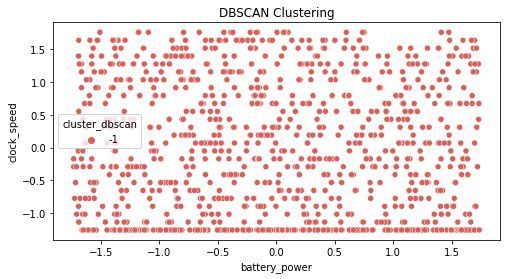

In [89]:
plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['battery_power'], data_cluster['clock_speed'], hue=data_cluster['cluster_dbscan'], palette=sns.color_palette('hls',1))
plt.title('DBSCAN Clustering')